# Welcome to NeuNorm

Package to normalize data using Open Beam (OB) and, optionally Dark Field (DF).

This notebook will illustrate the use of the NeuNorm library by going through a typical normalization

## Set up system

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
%matplotlib notebook

Add NeuNorm to python path

In [3]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import NeuNorm as neunorm
from NeuNorm.normalization import Normalization
from NeuNorm.roi import ROI

## Data Folders

Open Beam data path

In [11]:
path_ob = '../data/ob/'
assert os.path.exists(path_ob)

Sample data path

In [12]:
path_im = '../data/sample'
assert os.path.exists(path_im)

Dark Current data path

In [13]:
path_df = '../data/df'
assert os.path.exists(path_df)

## Loading Data 

In [14]:
o_grating = GratingInterferometer()
o_grating.load(folder=path_im)
o_grating.load(folder=path_ob, data_type='ob')
o_grating.load(folder=path_df, data_type='df')

NameError: name 'GratingInterferometer' is not defined

## Dark Field (DF) correction 

In [9]:
o_grating.df_correction()

## Normalization of the data 

We will use a normalization ROI.
```
 x0 = 3
 y0 = 5
 width = 20
 height = 40
```

In [10]:
#norm_roi = ROI(x0=3, y0=5, width=20, height=40)
#o_grating.normalization(roi=norm_roi)

## Calculate and display oscillation

<IPython.core.display.Javascript object>


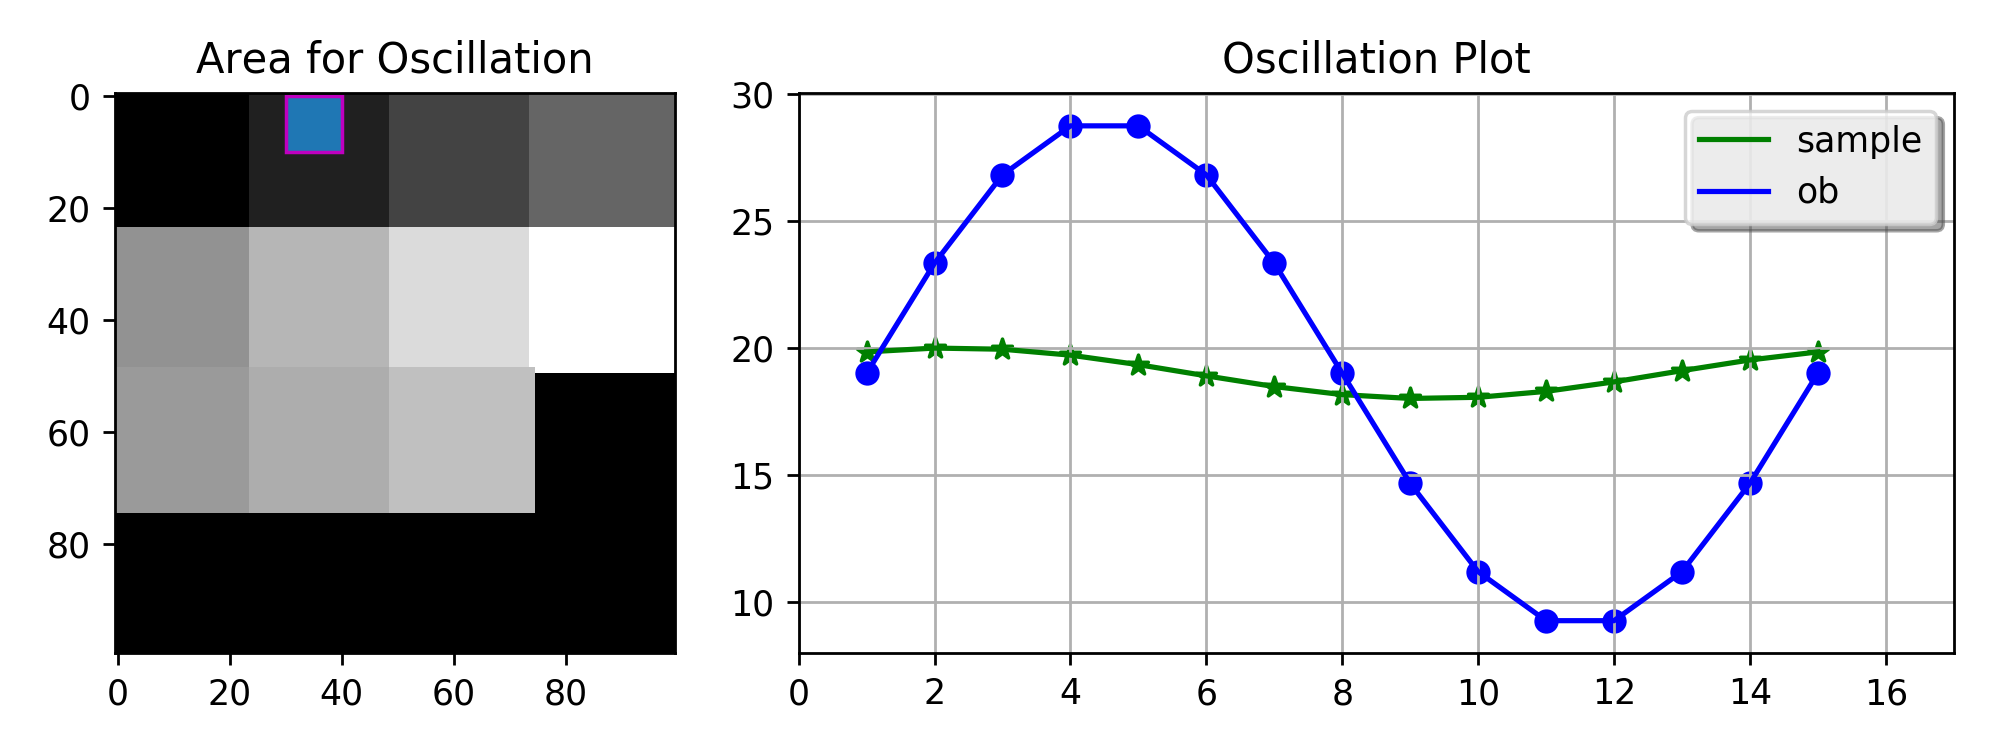

In [13]:
x0=30
y0=0
width=10
height=10

osc_roi = ROI(x0=x0, y0=y0, width=width, height=height)
o_grating.oscillation(roi=osc_roi, plot=True)

sample_oscillation = o_grating.data['sample']['oscillation']
ob_oscillation = o_grating.data['ob']['oscillation']

## Binning

In [68]:
_data_0 = o_grating.data['ob']['data'][0]
[height, width] = np.shape(_data_0)

In [69]:
bin = 3
new_height = height
new_width = width

_nbr_height_bin = int(np.floor(height/bin))
if not (np.mod(height, bin) == 0):
    new_height = int(_nbr_height_bin * bin)
new_height = int(new_height)

_nbr_width_bin = int(np.floor(width/bin))
if not (np.mod(width, bin) == 0):
    new_width = int(_nbr_width_bin * bin)
new_width = int(new_width)

print("previous height/width: {}/{}".format(height, width))
print("new height/width: {}/{}".format(new_height, new_width))

previous height/width: 100/100
new height/width: 99/99


In [70]:
type(_nbr_height_bin)

int

In [73]:
data_rebinned = []
_data = o_grating.data['ob']['data']
for _d in _data:
    _new_data = _d[0:new_height, 0:new_width]
    _new_data = _new_data.reshape(_nbr_height_bin, bin, _nbr_width_bin, bin)
    data_rebinned.append(_new_data.mean(axis=3).mean(axis=1))
            

In [74]:
np.shape(data_rebinned[0])

(33, 33)